# BB84 Protocol Explanation and Simulation

## Introduction
The BB84 protocol is the first quantum key distribution protocol, proposed by Charles Bennett and Gilles Brassard in 1984. It allows two parties, Alice and Bob, to generate a secure key for communication, even in the presence of an eavesdropper, Eve.

## Key Concepts
- **Quantum States**: The protocol uses quantum states to encode bits.
- **Polarization**: Photons can be polarized in different bases (e.g., horizontal/vertical or diagonal).
- **Measurement**: When a photon is measured, it can only be detected in the basis used for the measurement.

## Simulation of the BB84 Protocol
Let's simulate the BB84 protocol using our implementation.


In [8]:
import sys
import os

# Move up to the parent directory to access the 'src' folder
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Now import the BB84 class
from bb84 import BB84


In [9]:
import matplotlib.pyplot as plt

Alice's Key:  [np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0)]
Bob's Key:  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]


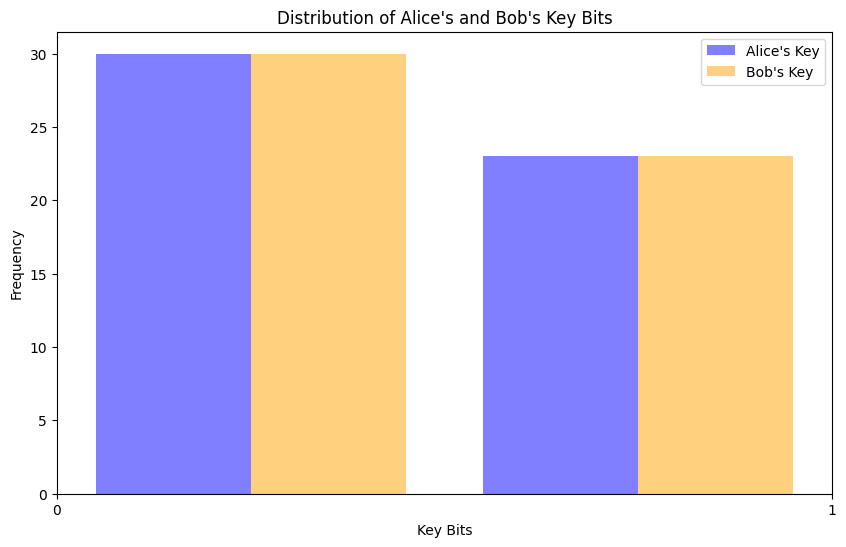

In [10]:
# Set up BB84 simulation
bb84 = BB84(photon_count=100)  # 100 photons
bb84.generate_key()

# Get Alice's and Bob's final keys
alice_key, bob_key = bb84.get_reconciled_key()

# Display the keys
print("Alice's Key: ", alice_key)
print("Bob's Key: ", bob_key)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.hist([alice_key, bob_key], bins=2, alpha=0.5, label=['Alice\'s Key', 'Bob\'s Key'], color=['blue', 'orange'])
plt.title('Distribution of Alice\'s and Bob\'s Key Bits')
plt.xlabel('Key Bits')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.legend()
plt.show()


# Eve's Attack Demonstration

## Introduction
In this notebook, we will demonstrate how an eavesdropper (Eve) can attempt to intercept the key being generated between Alice and Bob. We will show how Eve's interference can be detected.

## Eavesdropping Simulation
Let's simulate the eavesdropping process using our implementation.


In [12]:
import sys
import os

# Adjust the path to include the src directory
sys.path.append(os.path.abspath(os.path.join('..', 'src')))


In [15]:
import sys
import os

# Add the src directory to the Python path
src_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(src_path)

# Import necessary classes
from bb84 import BB84
from eavesdropper_simulation import Eavesdropper


In [16]:
# Set up the BB84 protocol
bb84 = BB84(photon_count=100)
bb84.generate_key()

# Simulate Eve's interception
eve = Eavesdropper()
photons = bb84.sent_photons  # Ensure you're accessing the correct property
eve_measurements, eve_bases = eve.intercept_photons(photons)

# Display Eve's results
print("Eve's Measurements: ", eve_measurements)
print("Eve's Bases: ", eve_bases)

# Detect if Eve has interfered
is_interference_detected = bb84.detect_eavesdropper(eve_measurements)

print("Eavesdropping Detected: ", is_interference_detected)


AttributeError: 'BB84' object has no attribute 'sent_photons'